In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt186/proc/r1'
!ls $ddir
# n5dir = '/data/qlyu/v1/data/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount.csv') #_intn.csv')

roi_all.csv  roi.csv  spotcount.csv  spotcount_intn.csv  spotcount_merged.csv


In [3]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [4]:
amin, amax = 500, 5000
cond = ((df['area'] < amax) & (df['area'] > amin))
df = df[cond]

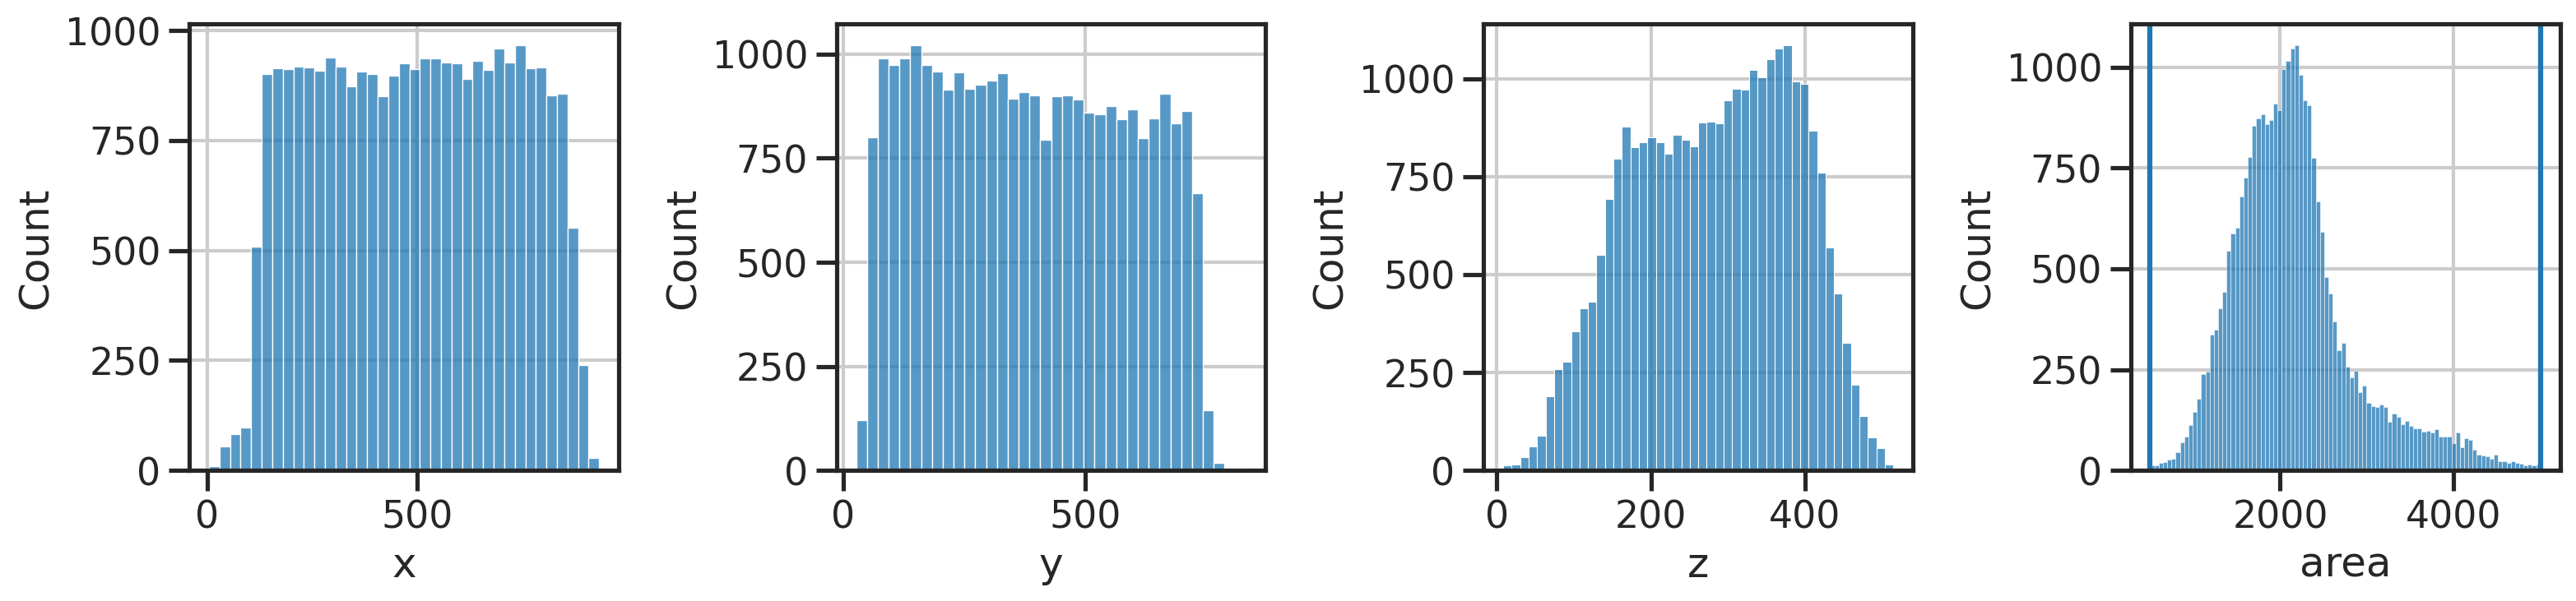

In [5]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(amin)
ax.axvline(amax)
fig.tight_layout()
plt.show()

In [6]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

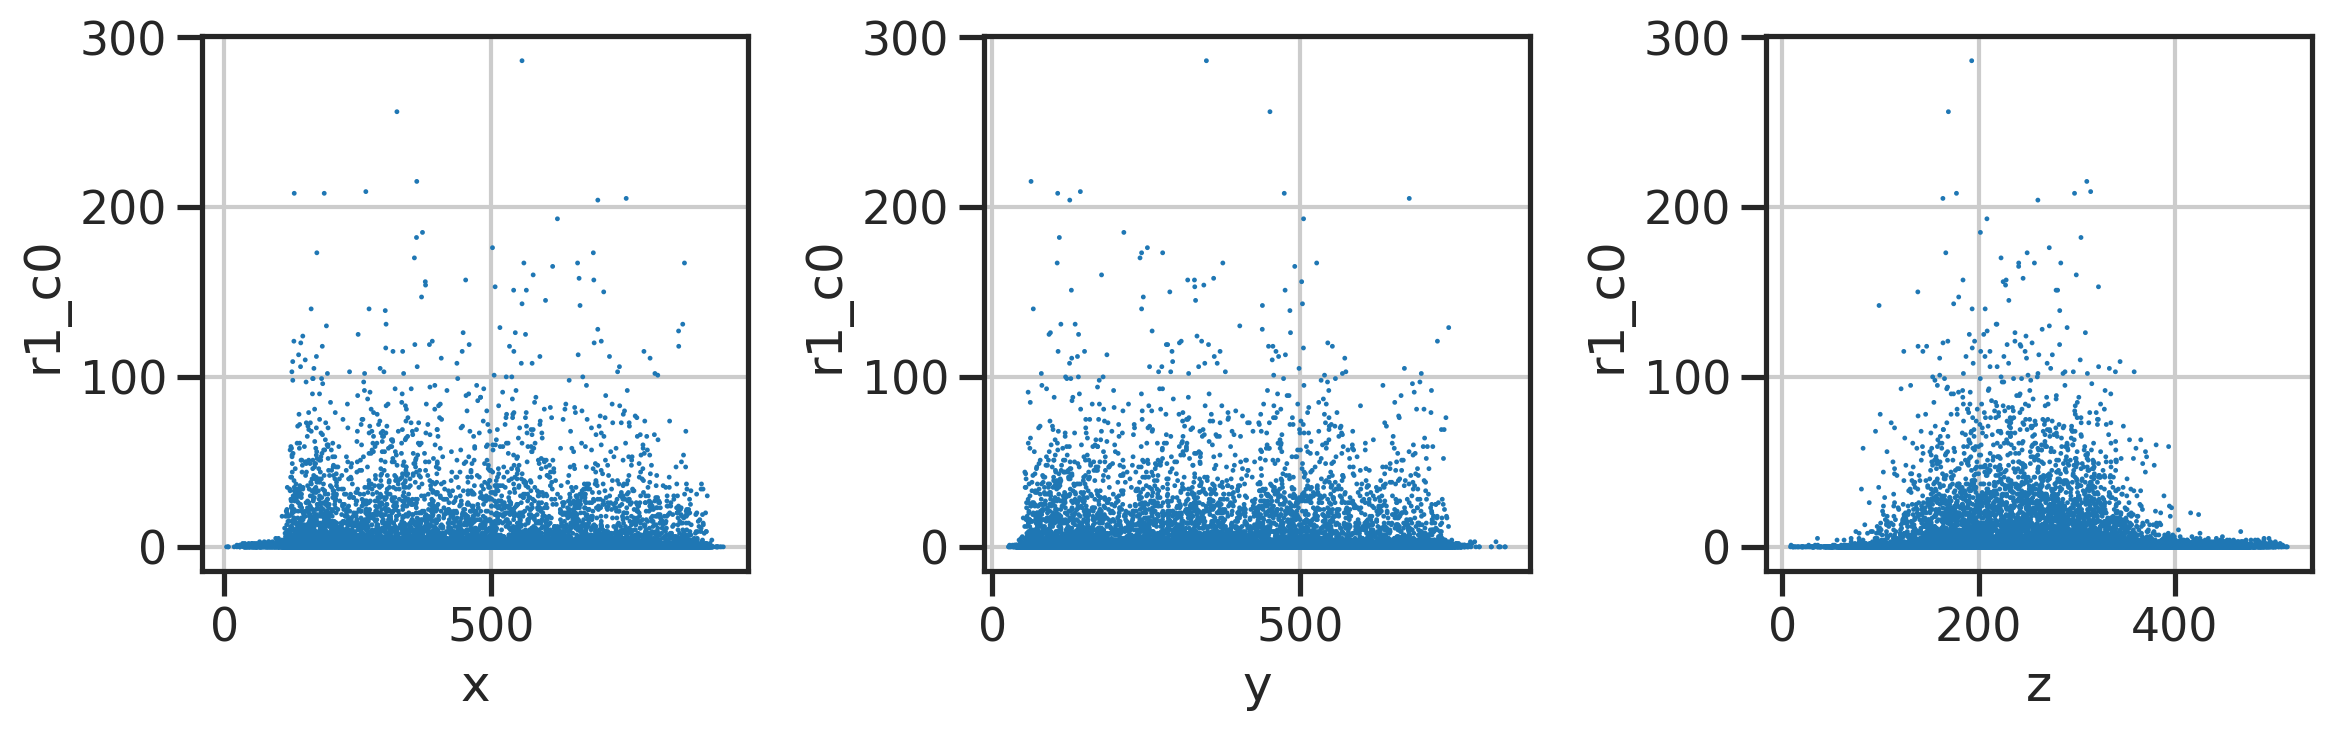

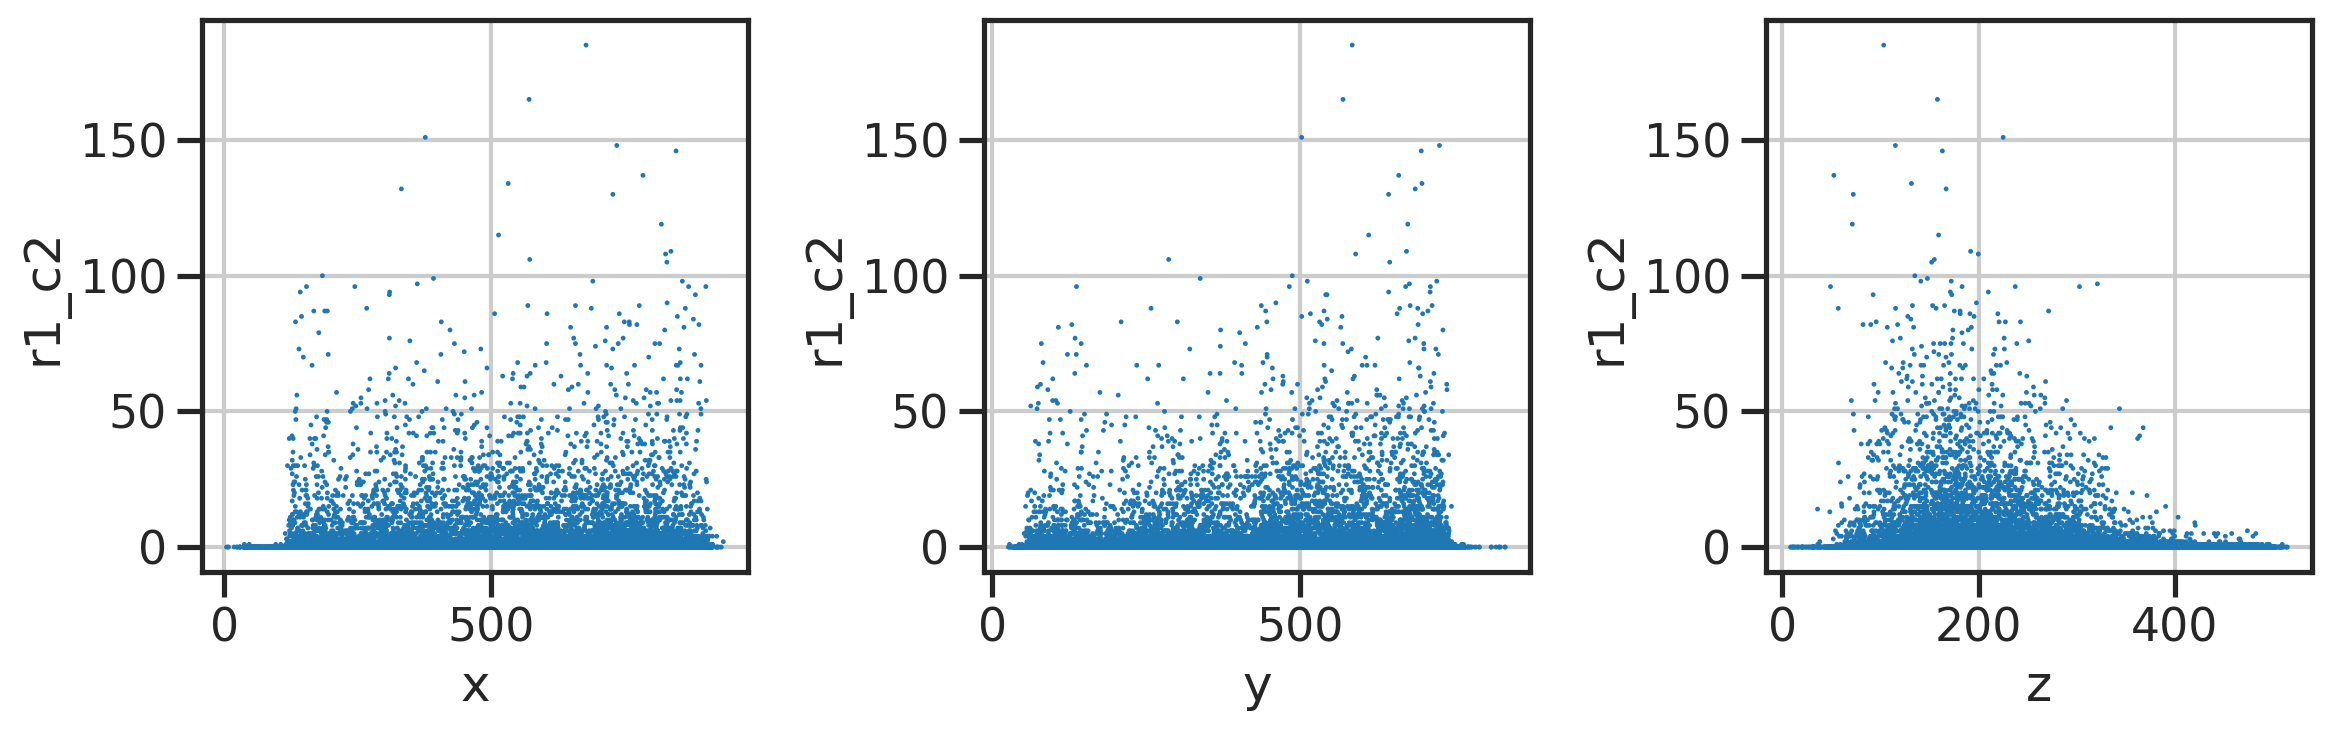

In [7]:
# cell level stats
for ch in channels: 
    fig, axs = plt.subplots(1,3,figsize=(3*4,1*4))
    ax = axs[0]
    sns.scatterplot(data=df, x='x', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('x')

    ax = axs[1]
    sns.scatterplot(data=df, x='y', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('y')

    ax = axs[2]
    sns.scatterplot(data=df, x='z', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('z')

    fig.tight_layout()
    plt.show()

In [8]:
df.describe()

z             y             x          area         r1_c0  \
count  28004.000000  28004.000000  28004.000000  28004.000000  28004.000000   
mean     282.341452    386.399347    494.997803   2160.368338      3.294458   
std      102.790383    201.140542    223.533997    704.825133     12.277848   
min        8.210331     26.664865      4.164600    502.660032      0.000000   
25%      199.225670    210.137105    301.664880   1694.966784      0.000000   
50%      289.607430    379.455886    497.608385   2075.338944      0.000000   
75%      367.135745    559.250769    688.085938   2443.624512      1.000000   
max      514.876611    833.382355    933.956930   4998.872256    286.000000   

              r1_c2  
count  28004.000000  
mean       1.960541  
std        8.039055  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      185.000000

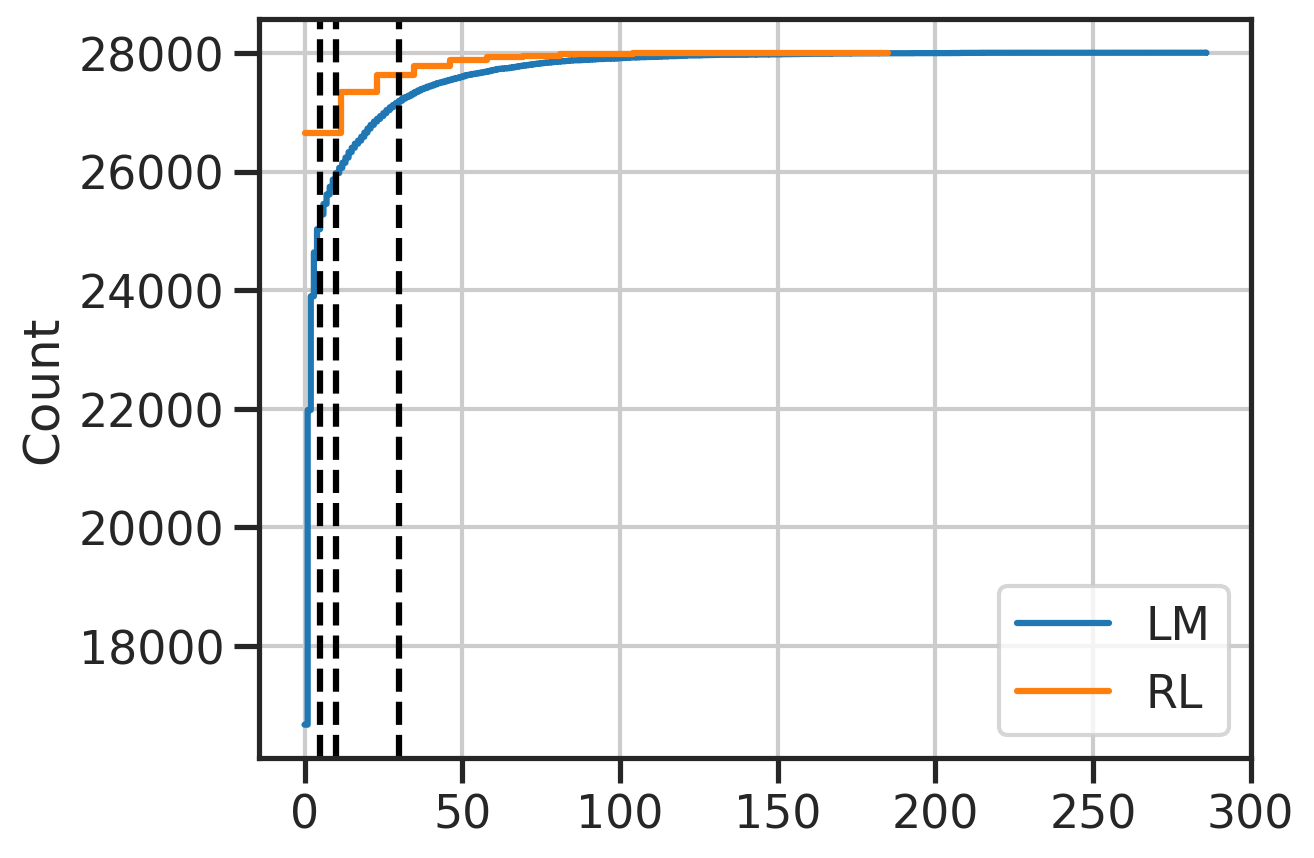

In [9]:
fig, ax = plt.subplots()
sns.histplot(df['r1_c0'].values, cumulative=True, element='step', fill=False, label='LM', ax=ax)
sns.histplot(df['r1_c2'].values, cumulative=True, element='step', fill=False, label='RL', ax=ax)
ax.axvline(5, linestyle='--', color='k')
ax.axvline(10, linestyle='--', color='k')
ax.axvline(30, linestyle='--', color='k')
ax.legend()

149.99100000000908


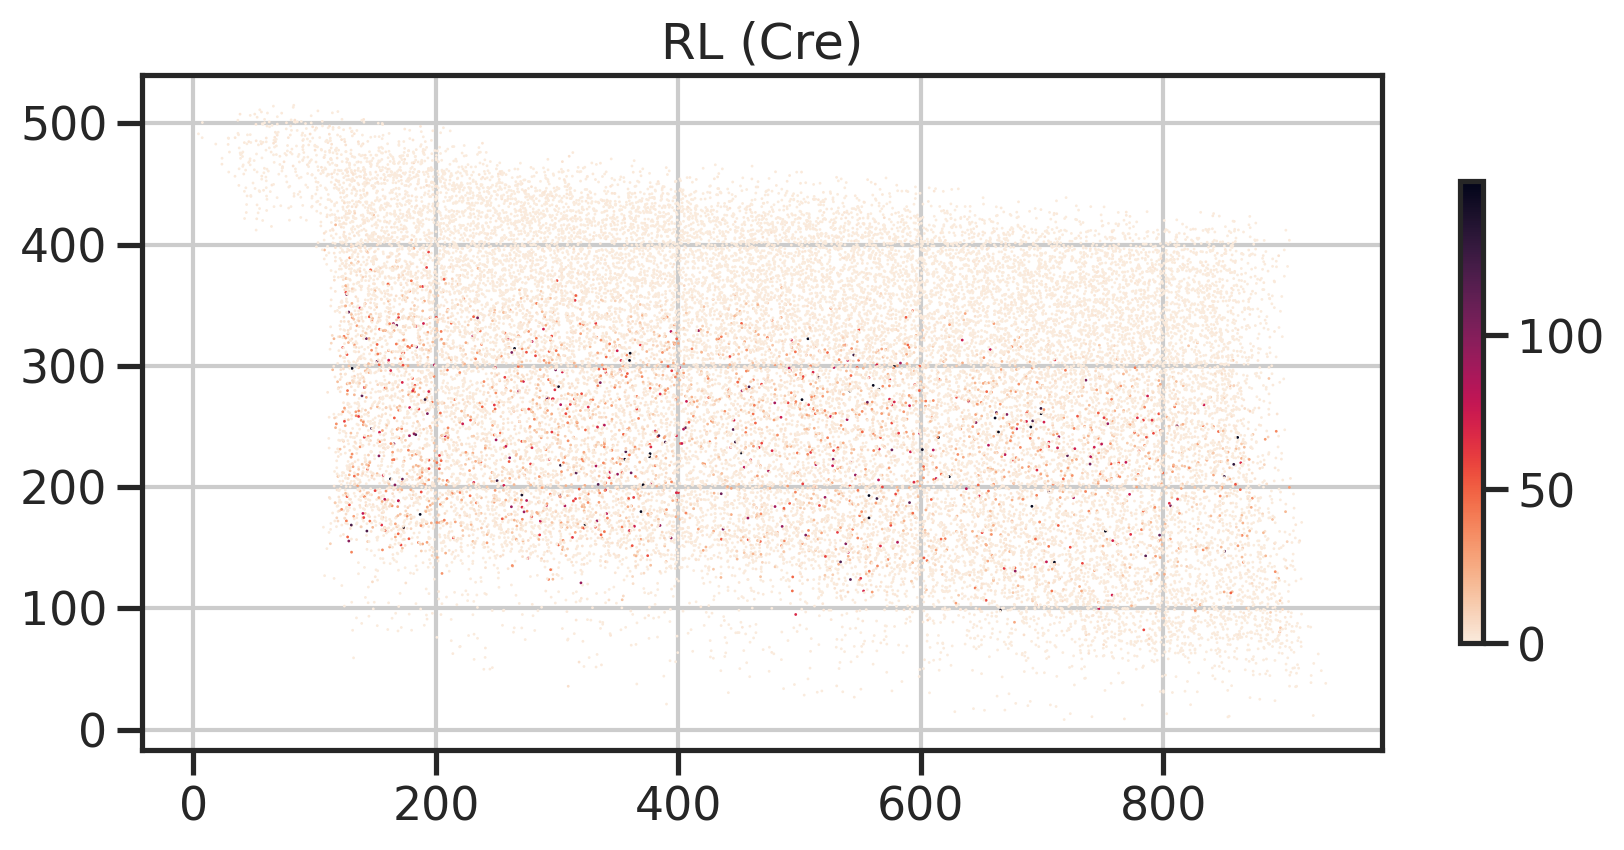

89.99700000000303


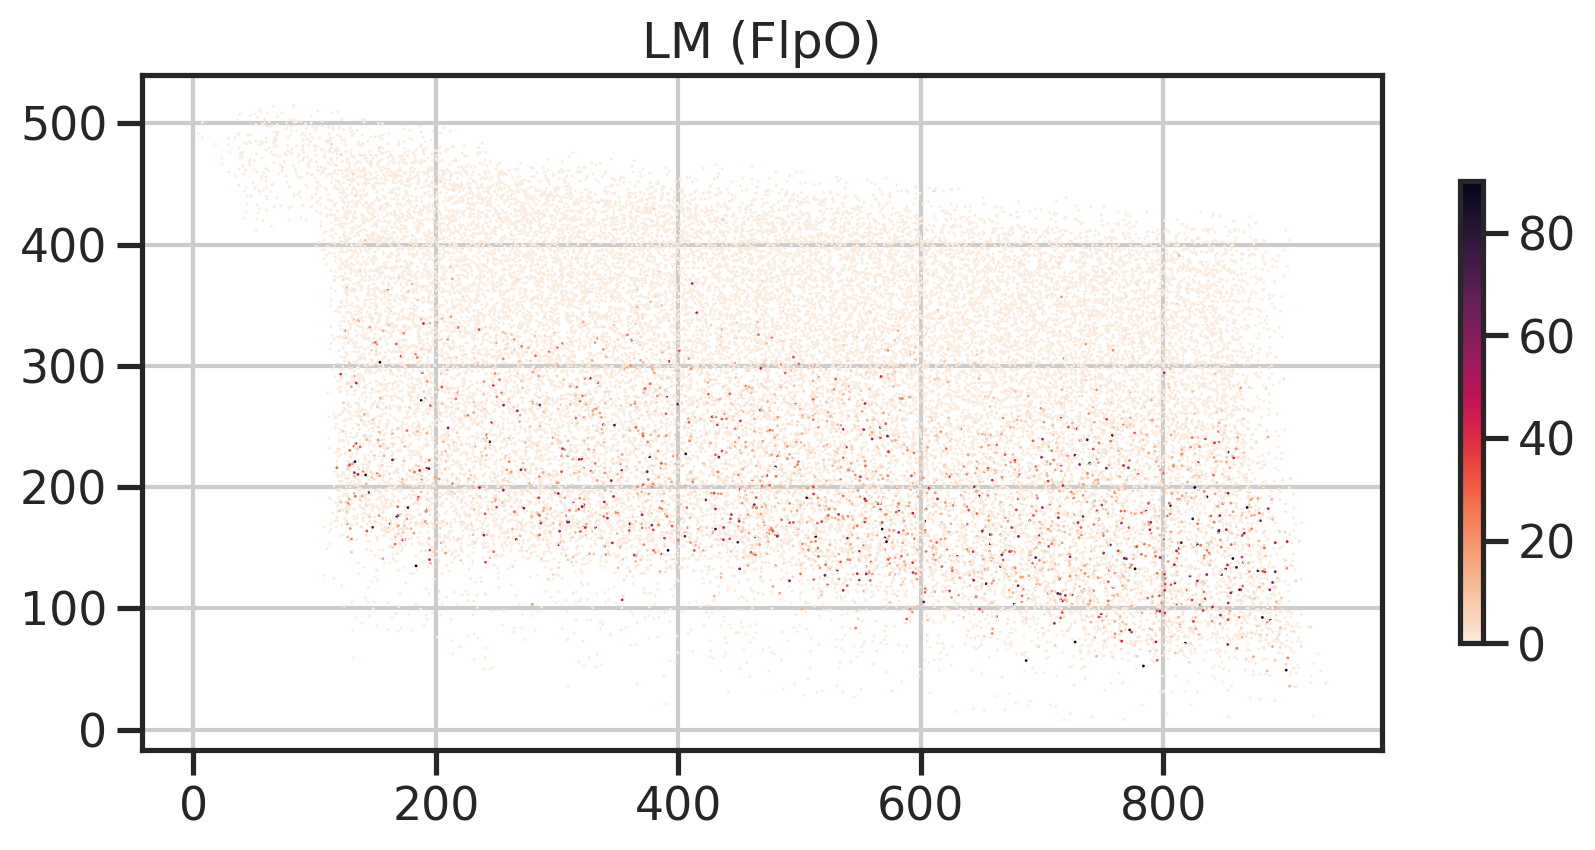

In [10]:
for ch, gene in zip(channels, genes):
    fig, ax = plt.subplots(figsize=(10,10))
    vmax = np.percentile(df[f'{ch}'], 99.9)
    print(vmax)
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}'], s=1, edgecolor='none', 
                   vmax = vmax,
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()

In [11]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th_c0 = 10 
th_c2 = 8 
df['bi_r1_c0'] = df['r1_c0'] > th_c0 
df['bi_r1_c2'] = df['r1_c2'] > th_c2 
df['lbl'] = df['bi_r1_c0'].astype(int) + 2*df['bi_r1_c2'].astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

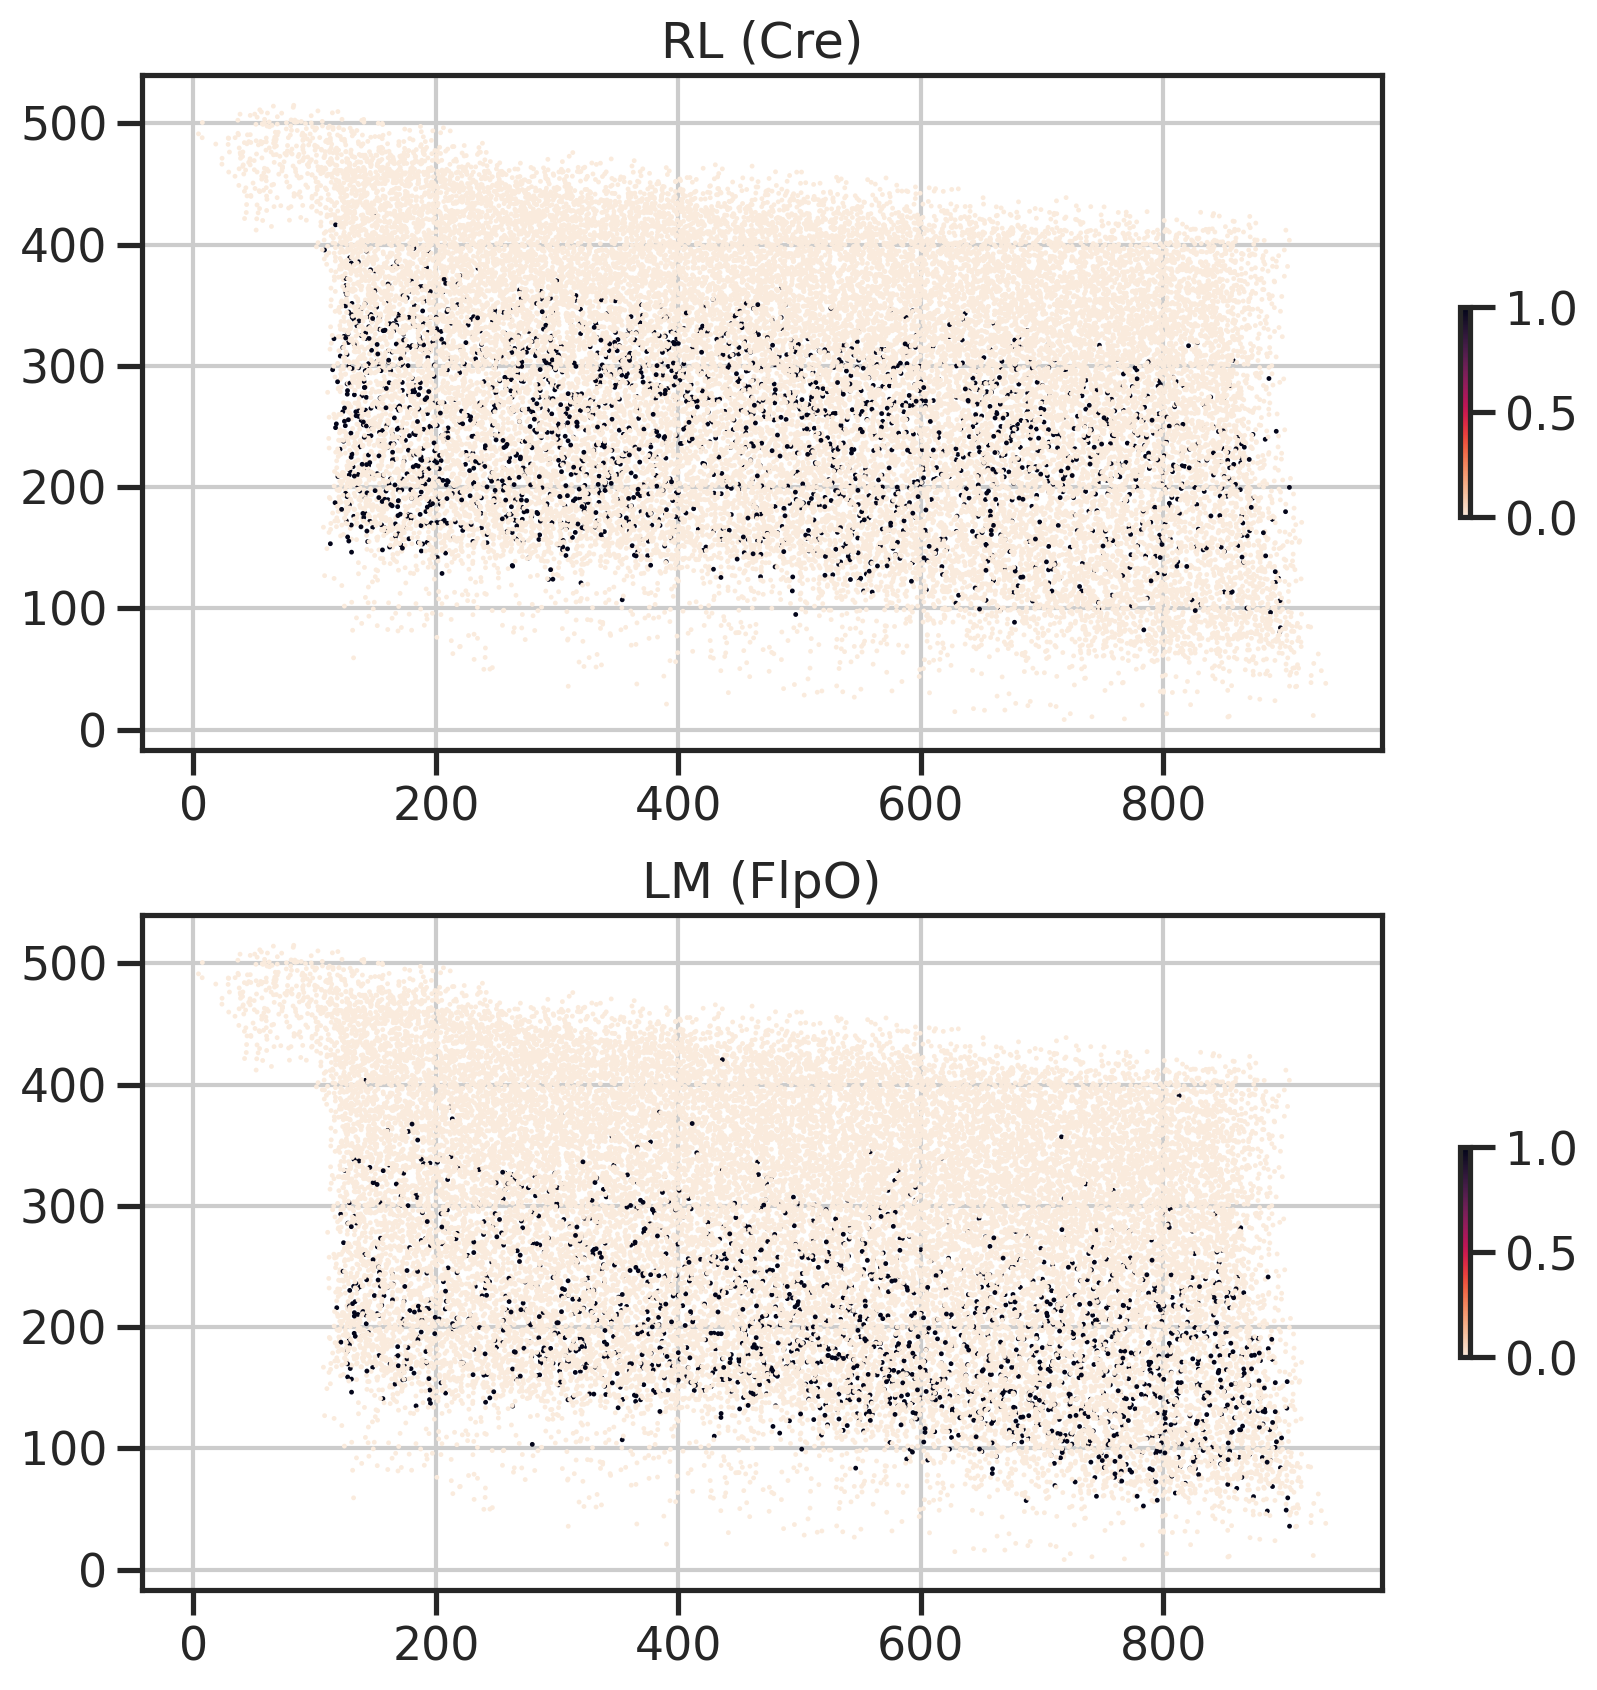

In [12]:
fig, axs = plt.subplots(2,1,figsize=(10,5*2))
for ax, ch, gene in zip(axs, channels, genes):
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'bi_{ch}'], s=3, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
plt.show()

In [13]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [14]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [15]:
df.value_counts('lbl_v2')

lbl_v2
NA      24602
RL       1702
LM       1373
both      327
dtype: int64

In [16]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      87.851735
RL       6.077703
LM       4.902871
both     1.167690
dtype: float64 

both in LM (%): 19.2
both in RL (%): 16.1
RL/LM (%): 119.4


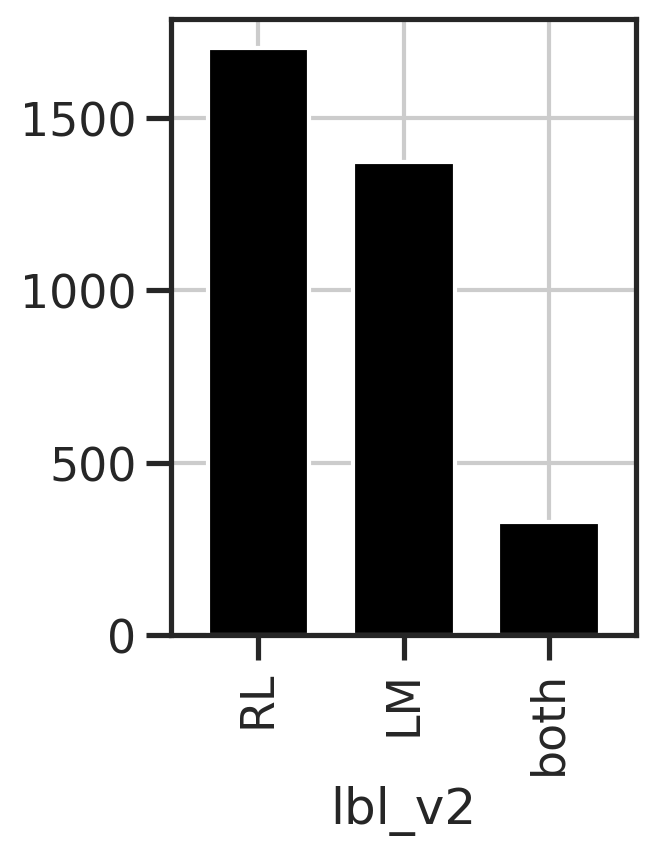

In [17]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

In [18]:
def plot_easifish_proj(data, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

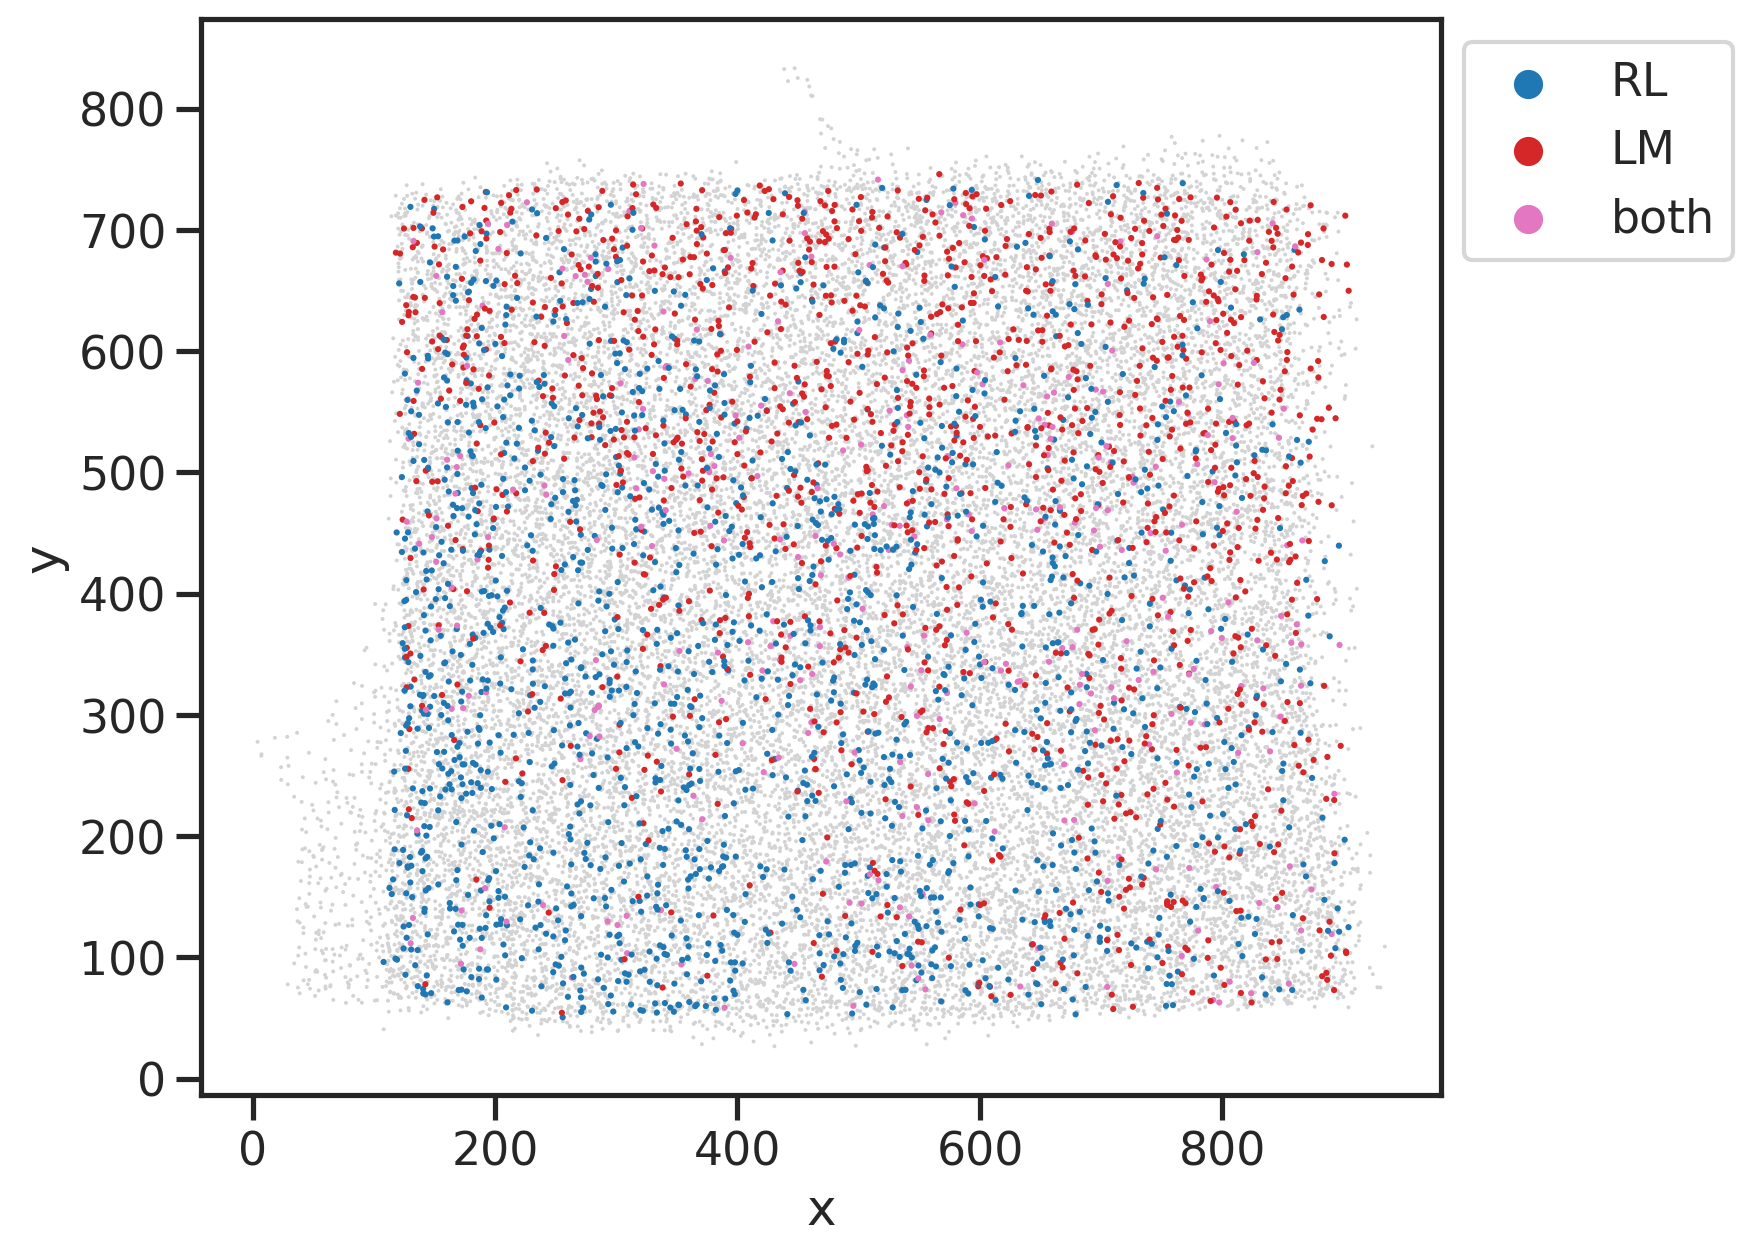

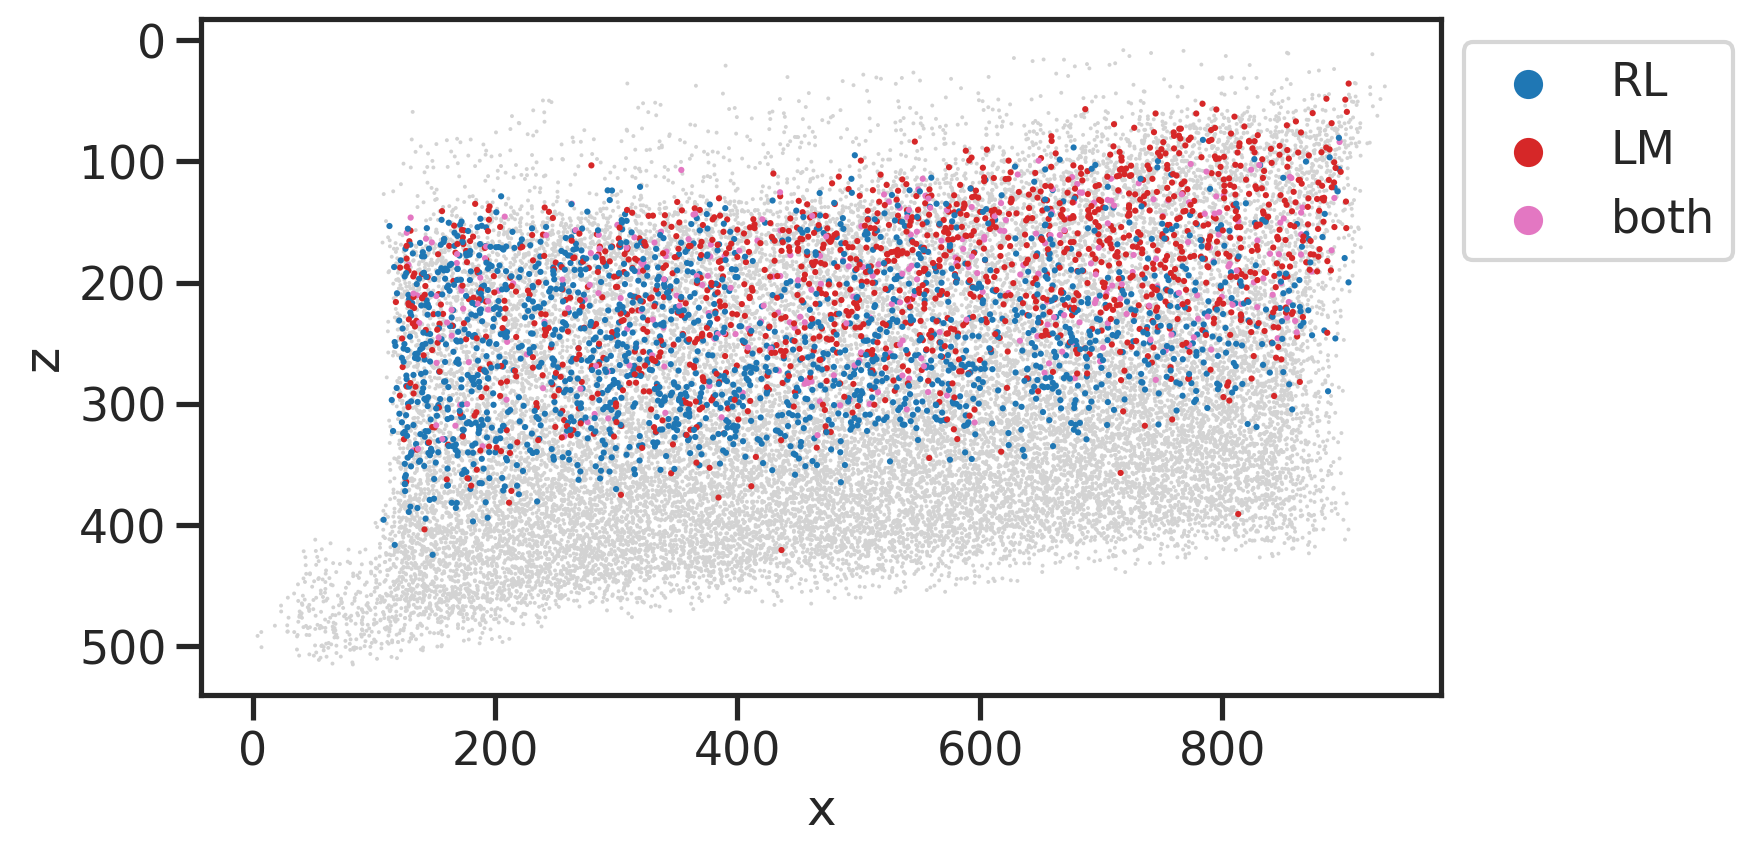

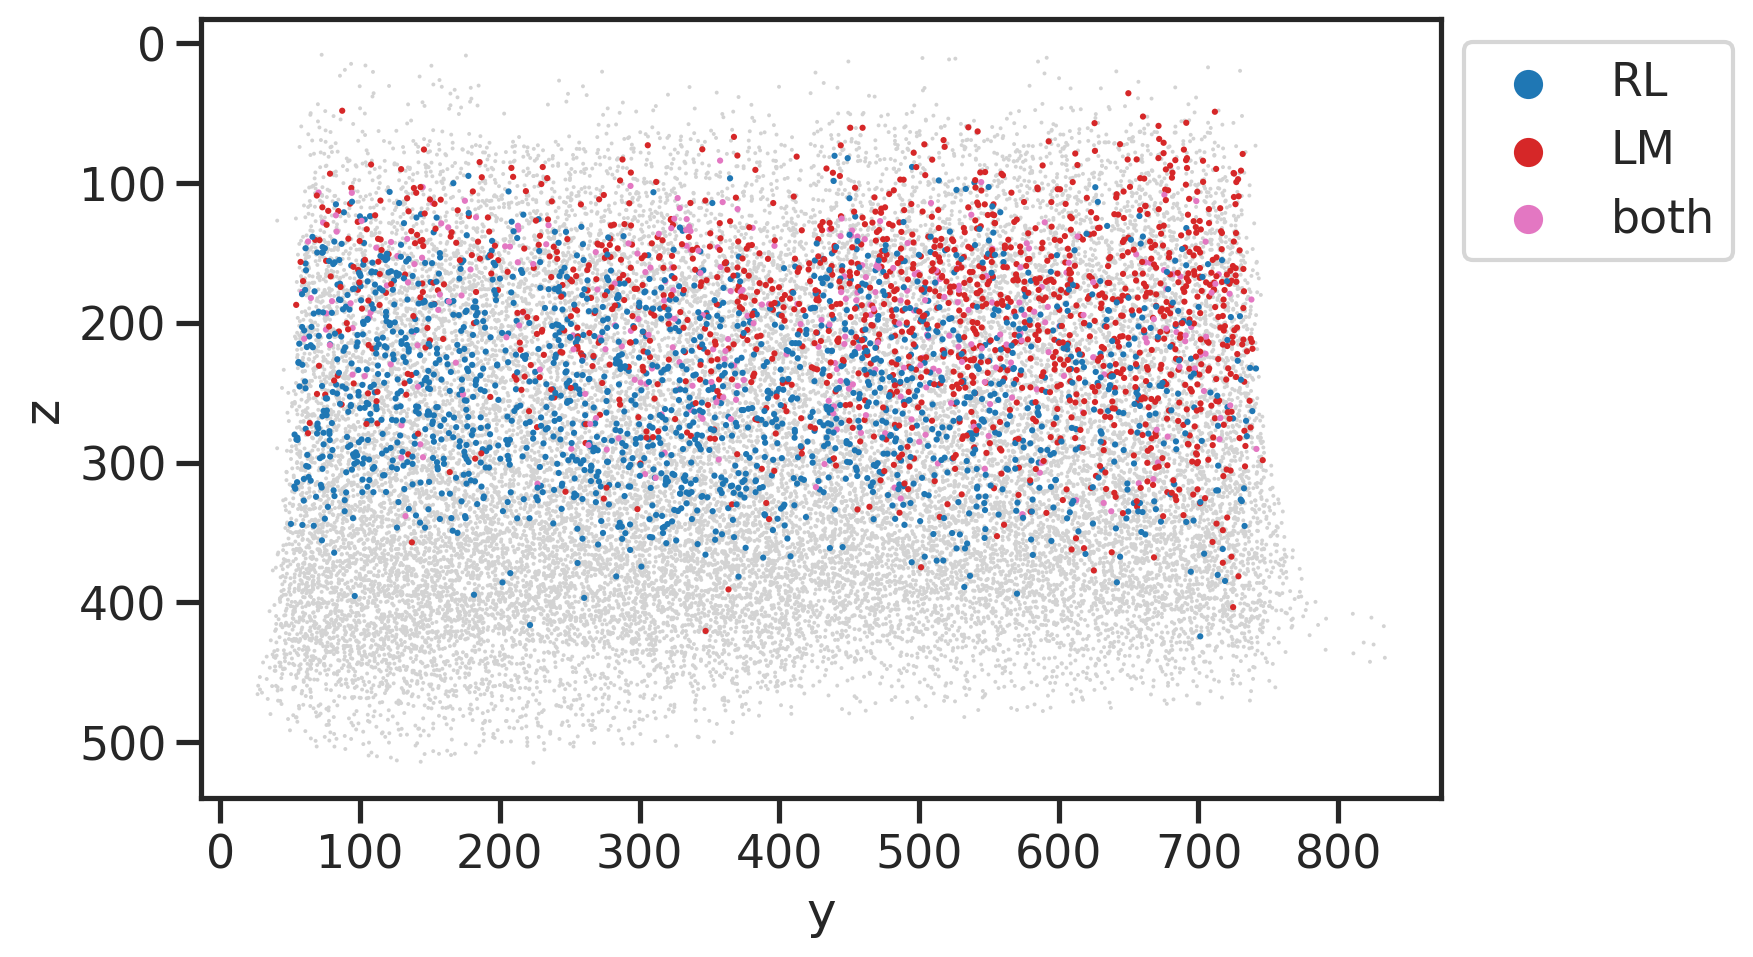

In [19]:
plot_easifish_proj(df, 'x', 'y')
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

In [21]:
xmin, ymin, zmin = df[['x', 'y', 'z']].min()
xmax, ymax, zmax = df[['x', 'y', 'z']].max()
xbins = np.arange(0, xmax+50, 50).astype(int)
ybins = np.arange(0, ymax+50, 50).astype(int)
zbins = np.arange(0, zmax+50, 50).astype(int)
xbins.shape, ybins.shape, zbins.shape

((20,), (18,), (12,))

In [22]:
xmin, ymin, zmin
xmax, ymax, zmax

(933.9569296375269, 833.3823549144583, 514.8766105629716)

In [23]:
df['xbin'] = pd.cut(df['x'], bins=xbins, labels=False) #.astype(int)
df['ybin'] = pd.cut(df['y'], bins=ybins, labels=False)
df['zbin'] = pd.cut(df['z'], bins=zbins, labels=False)
df

z           y           x         area  r1_c0  r1_c2  \
roi                                                                    
1      223.381698  118.023524  345.738751  2663.316096   27.0    4.0   
2      168.712415  365.227001  155.285191  3824.339904   65.0    0.0   
3      354.251797  140.049249  504.988163  2813.332032    1.0    0.0   
4      498.298442  165.682851   64.912608  2573.733120    0.0    0.0   
5      181.096767   71.323709  379.952383  3434.725056    2.0    0.0   
...           ...         ...         ...          ...    ...    ...   
28224   82.788737  479.759067  898.320341  1249.895808    0.0    0.0   
28225  280.886322  481.080502  796.140414   962.661504    0.0    0.0   
28226  317.530425  538.178367  492.551535  1088.504256    0.0    0.0   
28227   92.072529  253.880894  134.486927  2927.088192    0.0    0.0   
28228  229.877528  308.873387  182.145233   885.876096    0.0    0.0   

       bi_r1_c0  bi_r1_c2  lbl lbl_v2  xbin  ybin  zbin  
roi                                                      
1          True     False    1     RL     6     2     4  
2          True     False    1     RL     3     7     3  
3         False     False    0     NA    10     2     7  
4         False     False    0     NA     1     3     9  
5         False     False    0     NA     7     1     3  
...         ...       ...  ...    ...   ...   ...   ...  
28224     False     False    0     NA    17     9     1  
28225     False     False    0     NA    15     9     5  
28226     False     False    0     NA     9    10     6  
28227     False     False    0     NA     2     5     1  
28228     False     False    0     NA     3     6     4  

[28004 rows x 13 columns]

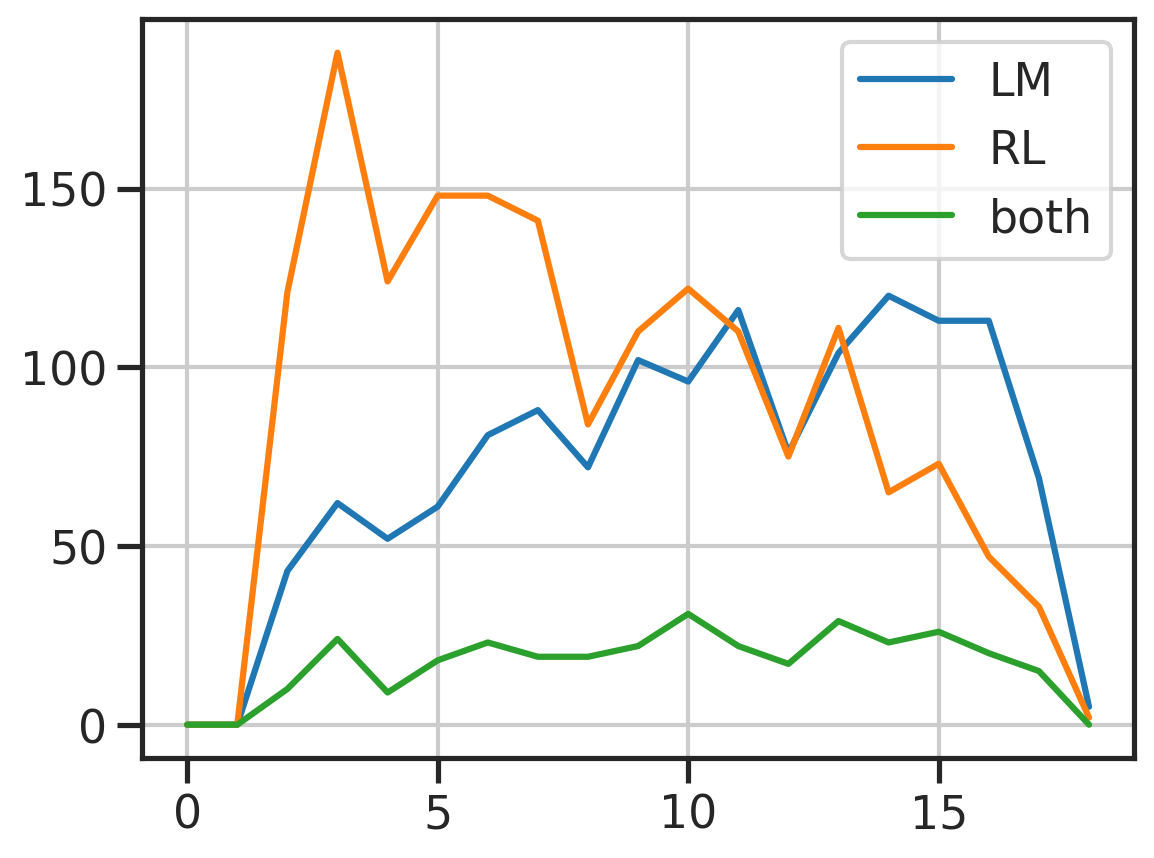

In [24]:
dfsize_x = df.groupby(['xbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
plt.plot(dfsize_x['LM'], label='LM')
plt.plot(dfsize_x['RL'], label='RL')
plt.plot(dfsize_x['both'], label='both')
plt.legend()

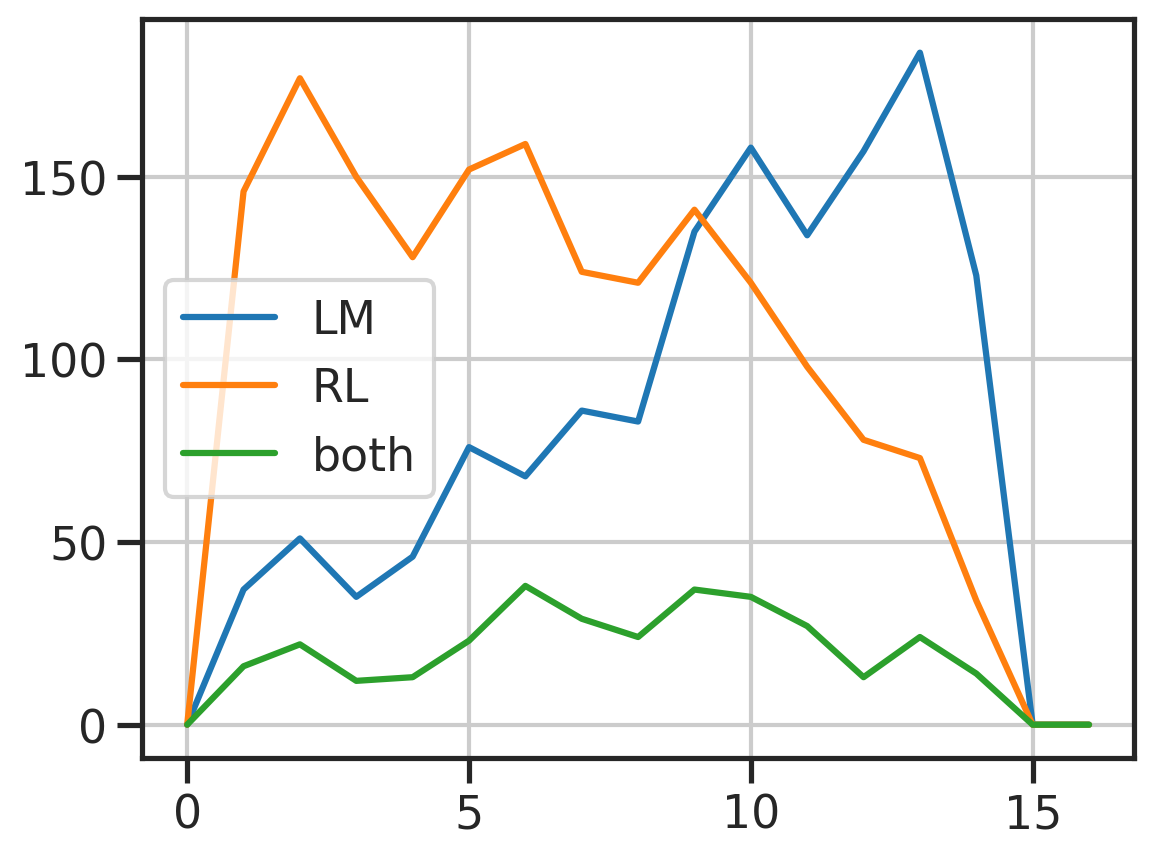

In [25]:
dfsize_y = df.groupby(['ybin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
plt.plot(dfsize_y['LM'], label='LM')
plt.plot(dfsize_y['RL'], label='RL')
plt.plot(dfsize_y['both'], label='both')
plt.legend()

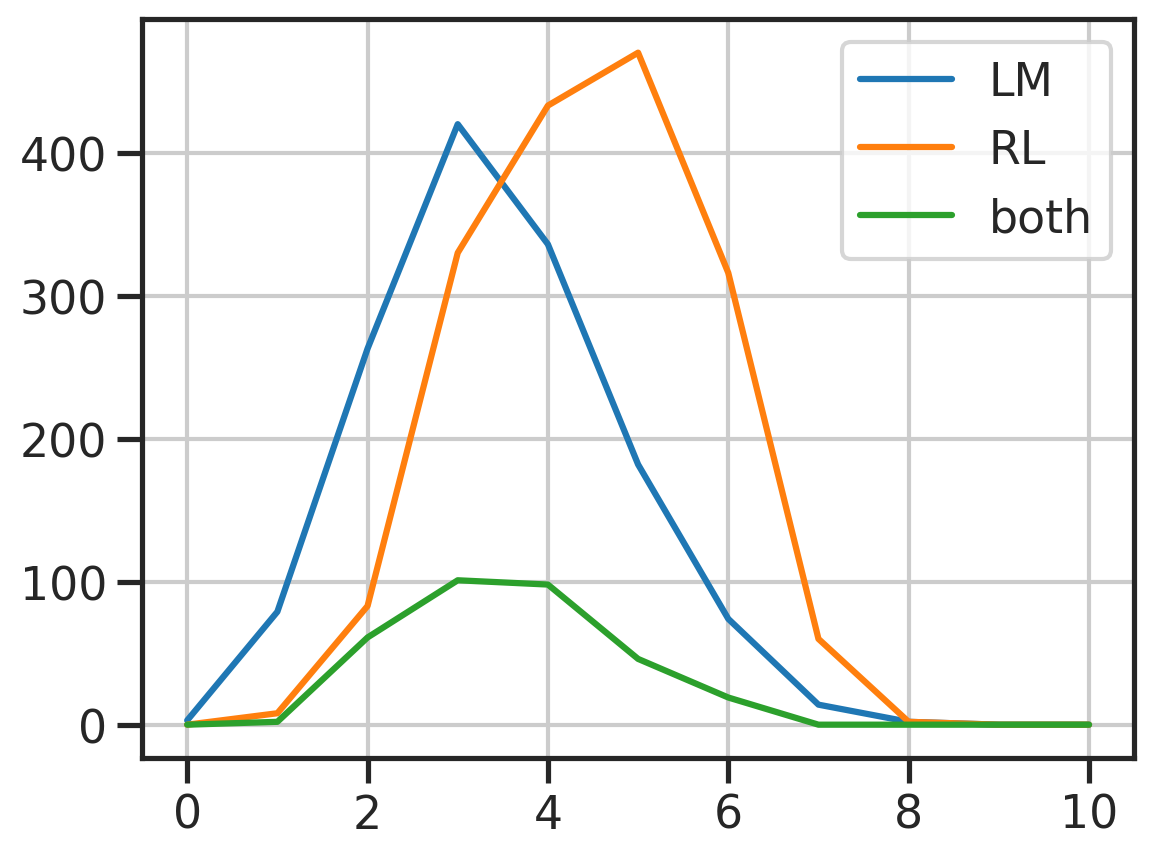

In [26]:
dfsize_z = df.groupby(['zbin', 'lbl_v2']).size().unstack().fillna(0) #mean().unstack()
plt.plot(dfsize_z['LM'], label='LM')
plt.plot(dfsize_z['RL'], label='RL')
plt.plot(dfsize_z['both'], label='both')
plt.legend()

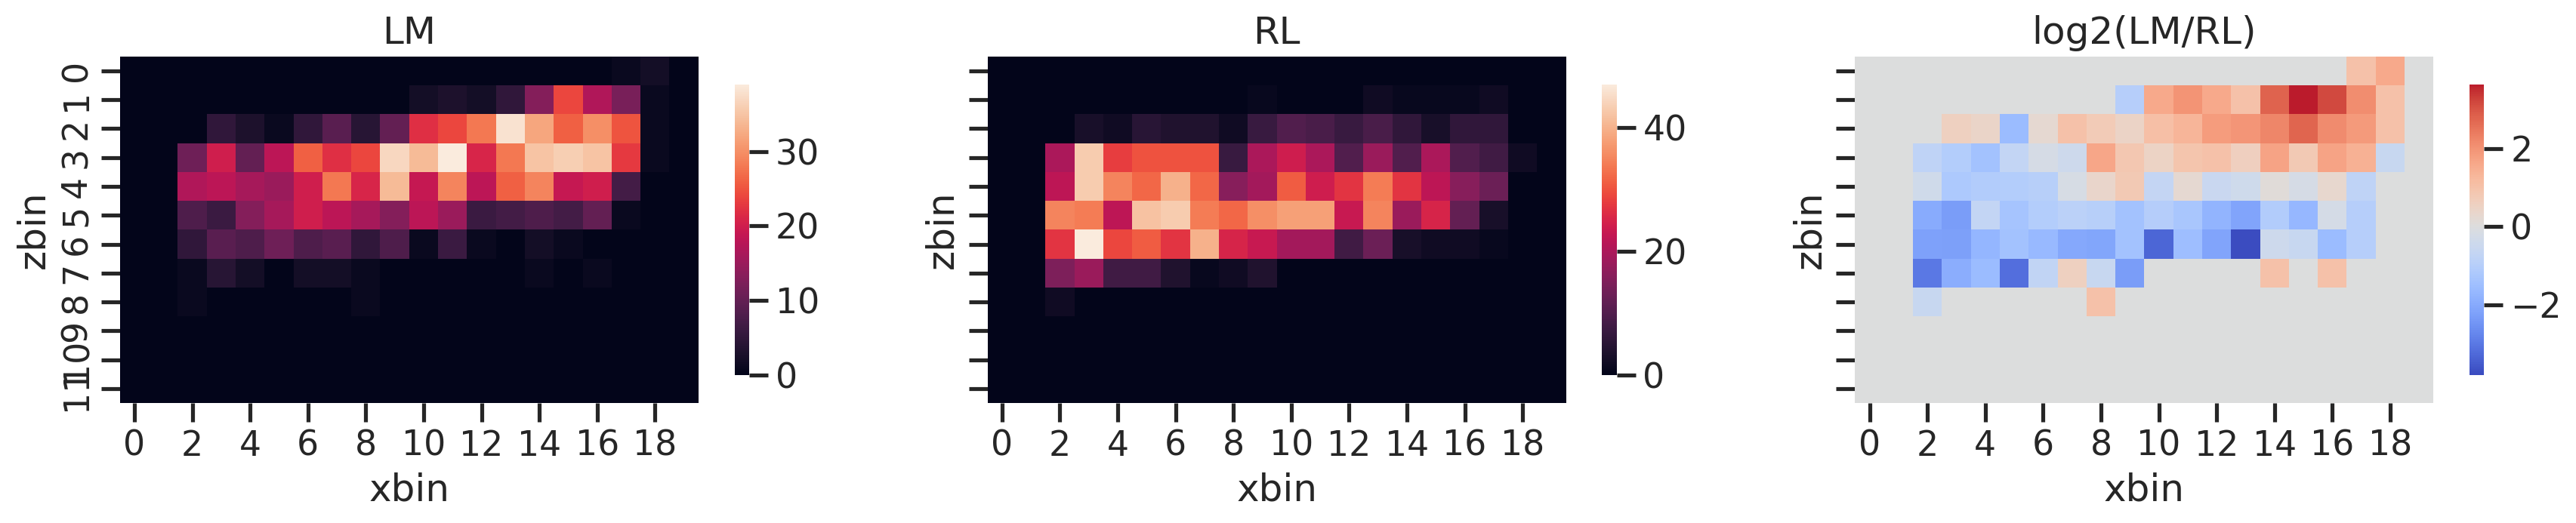

In [27]:
dfsize_xz1 = df[df['lbl_v2']=='LM'].groupby(['xbin', 'zbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz1 = dfsize_xz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz1 = dfsize_xz1.fillna(0).astype(int)

dfsize_xz2 = df[df['lbl_v2']=='RL'].groupby(['xbin', 'zbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xz2 = dfsize_xz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xz2 = dfsize_xz2.fillna(0).astype(int)

fig, axs = plt.subplots(1,3,figsize=(3*7,1*5),sharex=True,sharey=True)
ax = axs[0]
sns.heatmap(dfsize_xz1.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('LM')

ax = axs[1]
sns.heatmap(dfsize_xz2.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('RL')

ax = axs[2]
sns.heatmap(np.log2((dfsize_xz1.T+1)/(dfsize_xz2.T+1)), 
            cmap='coolwarm', 
            center=0,
            cbar_kws=dict(shrink=0.5)
           )
ax.set_aspect('equal')
ax.set_title('log2(LM/RL)')
plt.show()

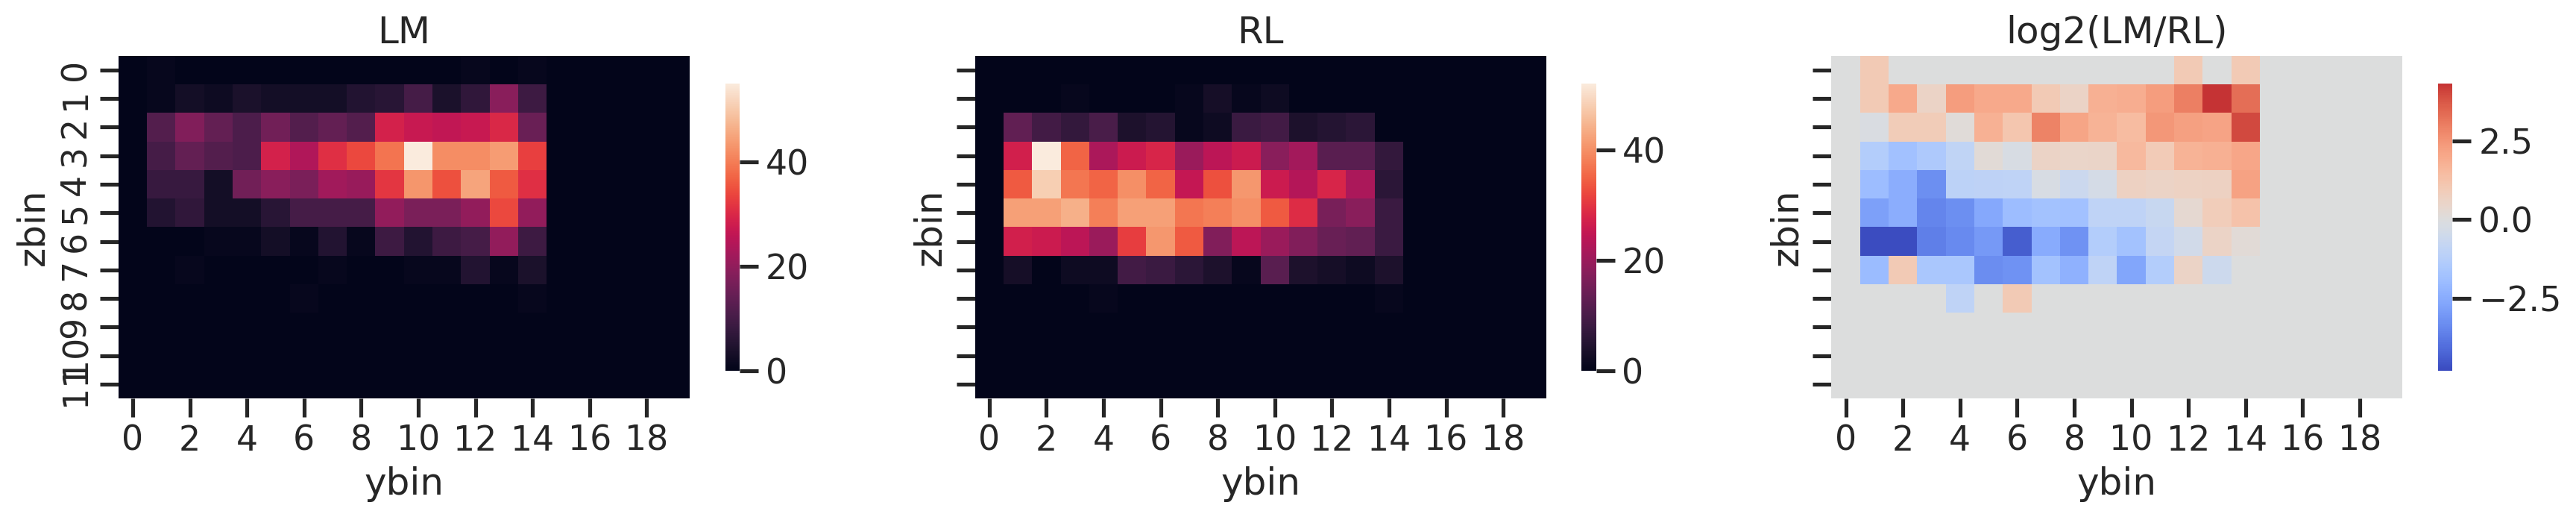

In [28]:
dfsize_yz1 = df[df['lbl_v2']=='LM'].groupby(['ybin', 'zbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz1 = dfsize_yz1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz1 = dfsize_yz1.fillna(0).astype(int)

dfsize_yz2 = df[df['lbl_v2']=='RL'].groupby(['ybin', 'zbin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_yz2 = dfsize_yz2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_yz2 = dfsize_yz2.fillna(0).astype(int)

fig, axs = plt.subplots(1,3,figsize=(3*7,1*5),sharex=True,sharey=True)
ax = axs[0]
sns.heatmap(dfsize_yz1.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('LM')

ax = axs[1]
sns.heatmap(dfsize_yz2.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('RL')

ax = axs[2]
sns.heatmap(np.log2((dfsize_yz1.T+1)/(dfsize_yz2.T+1)), 
            cmap='coolwarm', 
            center=0,
            cbar_kws=dict(shrink=0.5)
           )
ax.set_aspect('equal')
ax.set_title('log2(LM/RL)')
plt.show()

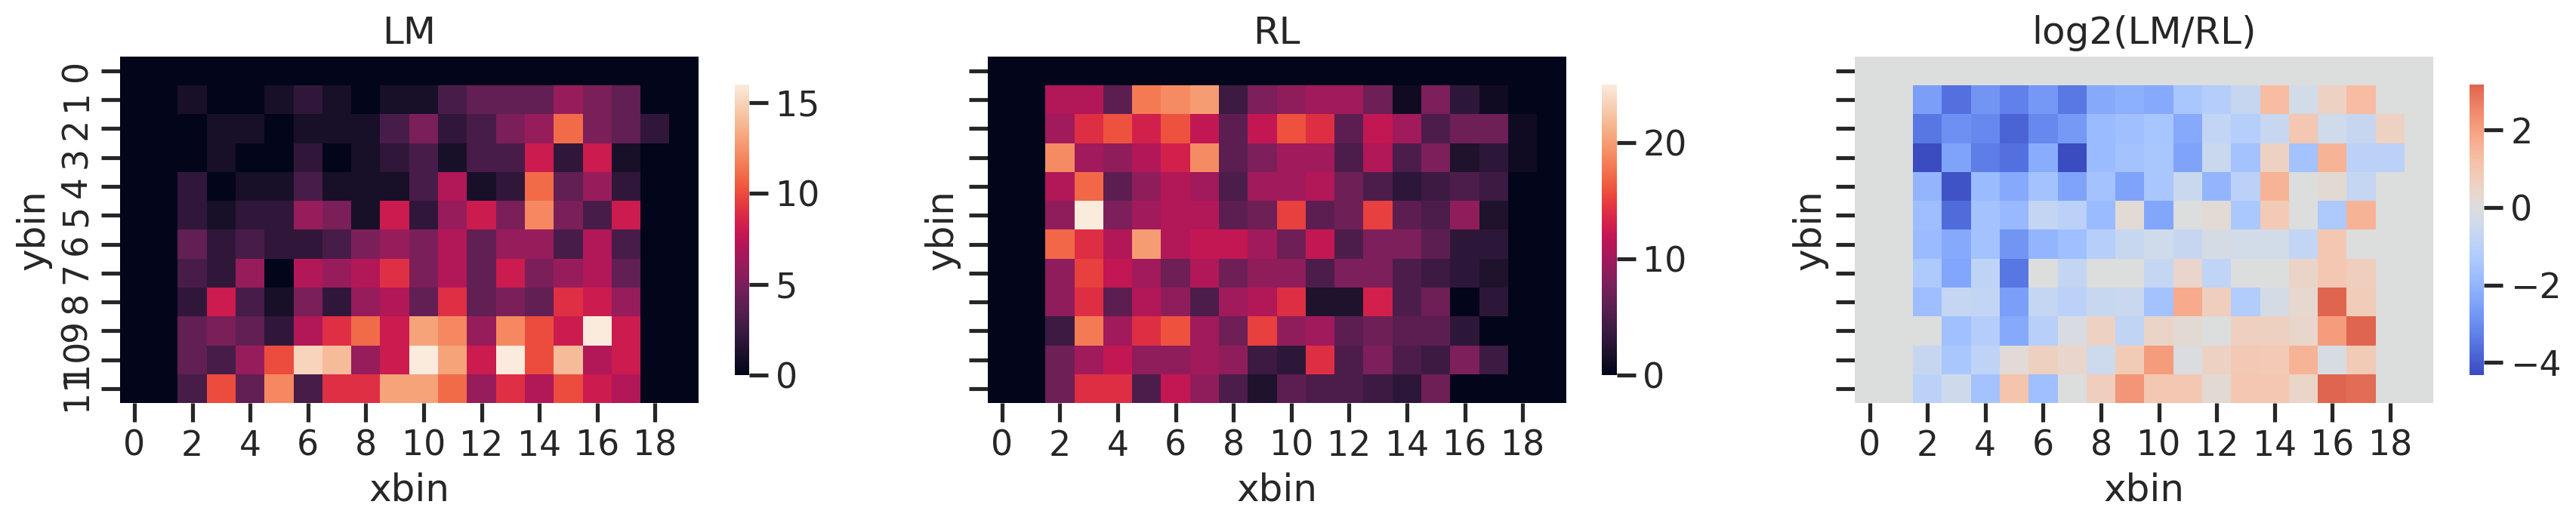

In [29]:
dfsize_xy1 = df[df['lbl_v2']=='LM'].groupby(['xbin', 'ybin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy1 = dfsize_xy1.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy1 = dfsize_xy1.fillna(0).astype(int)

dfsize_xy2 = df[df['lbl_v2']=='RL'].groupby(['xbin', 'ybin']).size().unstack().fillna(0).astype(int) #mean().unstack()
dfsize_xy2 = dfsize_xy2.reindex(np.arange(len(xbins))).T.reindex(np.arange(len(zbins))).T
dfsize_xy2 = dfsize_xy2.fillna(0).astype(int)

fig, axs = plt.subplots(1,3,figsize=(3*7,1*5),sharex=True,sharey=True)
ax = axs[0]
sns.heatmap(dfsize_xy1.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('LM')

ax = axs[1]
sns.heatmap(dfsize_xy2.T, ax=ax, cbar_kws=dict(shrink=0.5))
ax.set_aspect('equal')
ax.set_title('RL')

ax = axs[2]
sns.heatmap(np.log2((dfsize_xy1.T+1)/(dfsize_xy2.T+1)), 
            cmap='coolwarm', 
            center=0,
            cbar_kws=dict(shrink=0.5)
           )
ax.set_aspect('equal')
ax.set_title('log2(LM/RL)')
plt.show()